In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
df=pd.read_csv('ebspecialtest.csv',encoding='cp949') # eb다^큐6프2라3임 다 모은 거! 파일

In [3]:
df.to_csv('crawling_special_eb_ver1.csv',sep=',', encoding='utf-8')
df=pd.read_csv('crawling_special_eb_ver1.csv',encoding='utf-8') #utf-8로 바꿈

In [4]:
df=pd.read_csv('crawling_special_eb_ver1.csv',encoding='utf-8')

In [5]:
df.shape

(926, 8)

In [72]:
df.tail(1)

,index,tv,title,epi,dates,links,synop,long,tag
886,925,ebs,다큐프라임,"하늘의 땅, 몽골-제1부 초원의 전설 토올",2008.03.03,http://www.ebs.co.kr/tv/show?courseId=BP0PAPB0...,NaN,['\n-KBI와 EBS가 공동기획하고 문화관광부가 제작을 지원한-한몽 공동제작 프...,"한국, 산맥, 몽골, 아버지"


In [7]:
del df['Unnamed: 0']

# 칼럼 tv,title, epi, dates, links, synop, long 뽑음

In [74]:
df.head(1)

,index,tv,title,epi,dates,links,synop,long,tag
0,0,ebs,다큐프라임,"비밀의 땅 파미르 - 2부 비밀의 땅, 숨겨진 강",2018.09.11,http://www.ebs.co.kr/tv/show?courseId=BP0PAPB0...,"""아시아의 고산지대인 파미르, 텐샨,히말라야 의 자연과 사람들의 삶을 알아본다. 중...","['\n\n\n\n\n\n단 한 번도 공개된 적 없는 비밀의 땅, 세계의 지붕 파미...","늑대, 빙하, 고원, 텐샨, 사람들, 고지대, 파미르, 저지대, 야생동물"


## 글자 수가 적으면 에러가 뜸 그래서 내용없음이 없는 파일을 따로 만듬

In [9]:
dfa = df[df['long'] !='내용없음']

In [75]:
dfa.head(1)

,tv,title,epi,dates,links,synop,long
0,ebs,다큐프라임,"비밀의 땅 파미르 - 2부 비밀의 땅, 숨겨진 강",2018.09.11,http://www.ebs.co.kr/tv/show?courseId=BP0PAPB0...,"""아시아의 고산지대인 파미르, 텐샨,히말라야 의 자연과 사람들의 삶을 알아본다. 중...","['\n\n\n\n\n\n단 한 번도 공개된 적 없는 비밀의 땅, 세계의 지붕 파미..."


In [11]:
df = dfa.reset_index() # 인덱스를 새로 적용

In [76]:
# 칼럼<epi>에서 <지네> 가 들어간 시트를 다 보여
p = r'.*(지네).*'

addsy = df[df['epi'].str.match(p)]
addsy

,index,tv,title,epi,dates,links,synop,long,tag
361,366,ebs,다큐프라임,한국의 지네,2014.06.04,http://www.ebs.co.kr/tv/show?courseId=BP0PAPB0...,"세트 제작 및 지네의 생태 촬영,월동장면,독성실험, 인간과의 관계 및 한방약재로서의...",['\n혐오를 벗고 호기심 풀어 놓는 <지네>지네는 독이 있다는 이유로 해충으로 분...,"다리, 대상"
819,850,ebs,다큐프라임,지네,2009.04.08,http://www.ebs.co.kr/tv/show?courseId=BP0PAPB0...,지네,['\n혐오를 벗고 호기심 풀어 놓는 <지네>지네는 독이 있다는 이유로 해충으로 분...,"다리, 대상"


In [13]:
# addsy.iloc[0]

# 토큰화

In [14]:
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [15]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 680

In [16]:
sample_title = df['epi'][sample_index]
sample_title

'내 아이의 전쟁,알레르기 3부 음식이 아이를 공격한다.'

In [17]:
sample_content = df['long'][sample_index]
#sample_content

In [18]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['내', '아이의', '전쟁', ',', '알레르기', '3', '부', '음식이', '아이를', '공격한다', '.']

In [19]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[40:50]

['아토피피부염', '아이들', '.', '그런', '아이들을', '지켜보며', '하루하루', '눈물', '속에', '생활하고']

In [20]:
import re

In [21]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [22]:
df.isnull().sum()

index     0
tv        0
title     0
epi       0
dates     0
links     0
synop    10
long      0
dtype: int64

In [23]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = df['long'].apply(preprocessing)

Wall time: 23.9 ms


In [24]:
sentences.head()

0    ['      단 한 번도 공개된 적 없는 비밀의 땅, 세계의 지붕 파미르    거...
1    ['      단 한 번도 공개된 적 없는 비밀의 땅, 세계의 지붕 파미르    거...
2    [\'\ 위대한 인류문명의 초석이 된 인류 최대의 제국 "로마". \ \ 2천년전 ...
3    [' 새벽 푸른빛이 묘비를 둘러싸고 있다. 직지트 1926-2013 비석에 적힌 글...
4    ['  한 켤레의 운동화에 담긴 삶의 발자국을 따라가는 여정  \xa0 일상적인 소...
Name: long, dtype: object

In [25]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 6.38 s


0    [[', 단, 한, 번도, 공개된, 적, 없는, 비밀의, 땅, ,, 세계의, 지붕,...
1    [[', 단, 한, 번도, 공개된, 적, 없는, 비밀의, 땅, ,, 세계의, 지붕,...
2    [[\'\, 위대한, 인류문명의, 초석이, 된, 인류, 최대의, 제국, ", 로마,...
Name: long, dtype: object

In [26]:
tokens[sample_index][10:20]

['환경에서', '살고', '있다', '.', '그런데', ',', '음식', ',', '꽃가루', ',']

In [27]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

지정된 경로를 찾을 수 없습니다.


In [28]:
!pip install -q 'wordcloud[all]'

Invalid requirement: ''wordcloud[all]''
Traceback (most recent call last):
  File "c:\python\anaconda3\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "c:\python\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1632, in parseString
    raise exc
  File "c:\python\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "c:\python\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "c:\python\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "c:\python\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "c:\python\anaco

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath,
                        stopwords = STOPWORDS, # 한국어는 해당이 없습니다. 한국어를 적용해 주려면 별도 처리가 필요합니다.
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

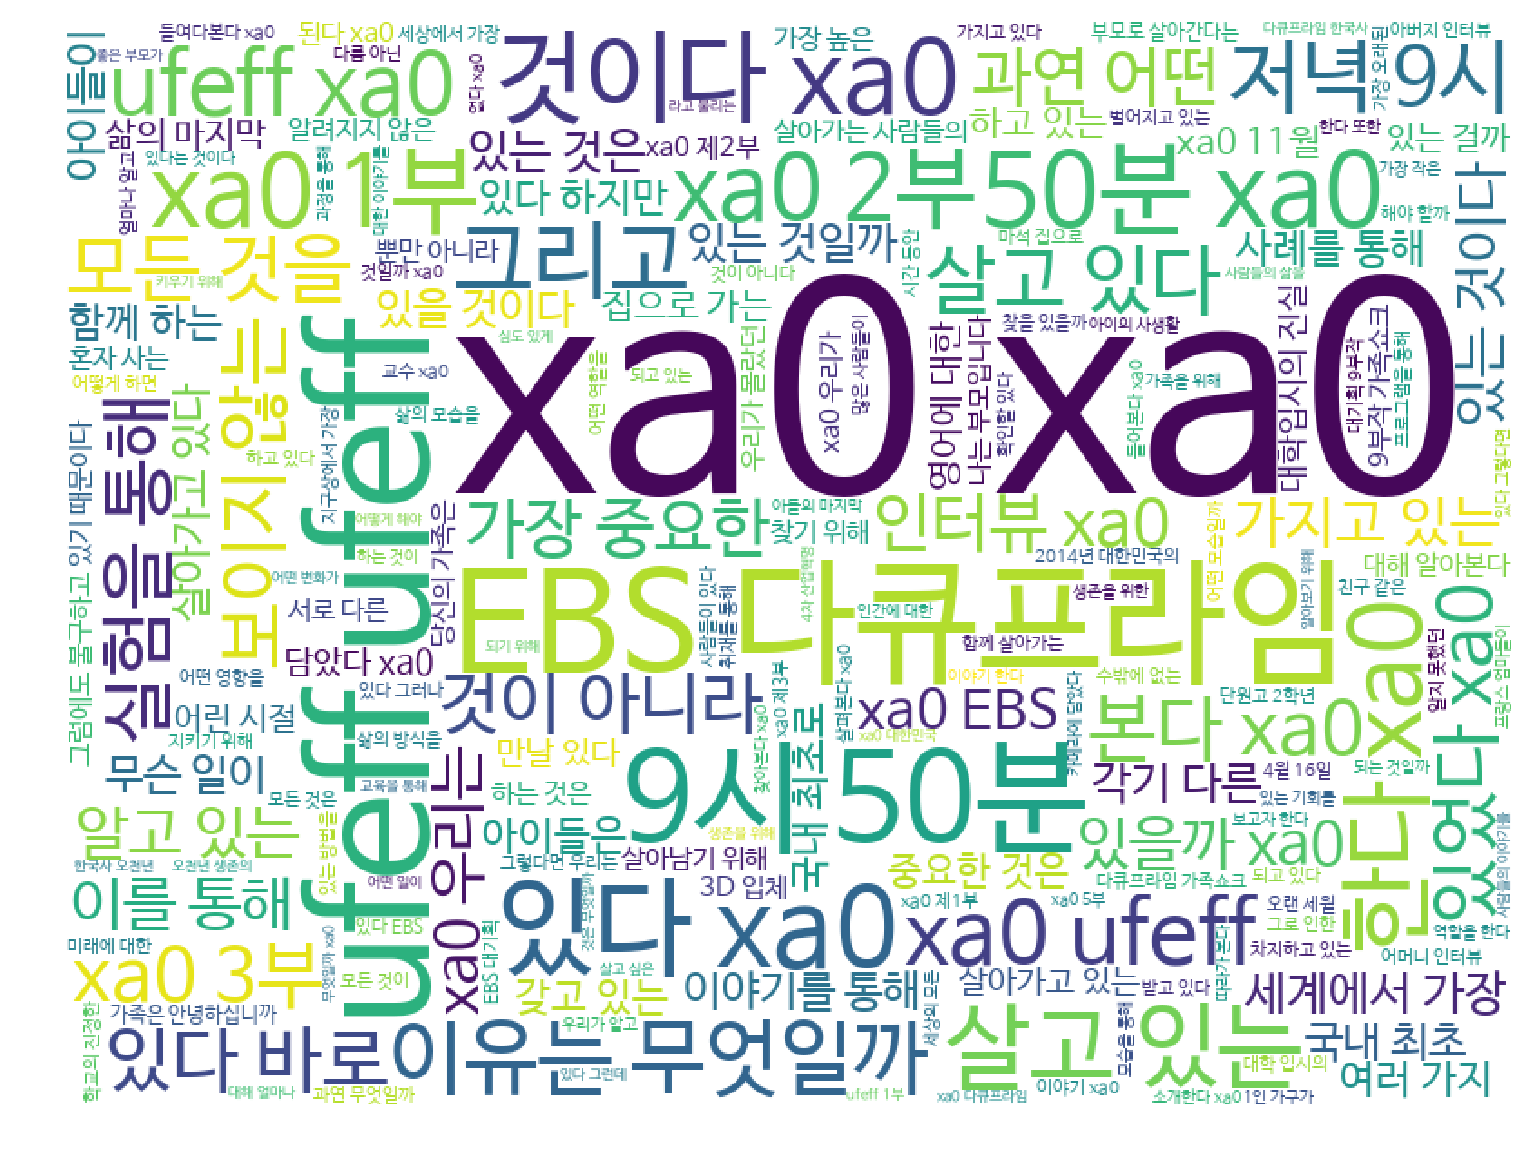

Wall time: 8.6 s


In [30]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

# 불용어 너무 많아 soynlp로 명사만 뽑자

In [31]:
from soynlp.noun import LRNounExtractor

In [32]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (55915, 28358) tokens
building lr-graph completedWall time: 6.36 s


In [80]:
#nouns

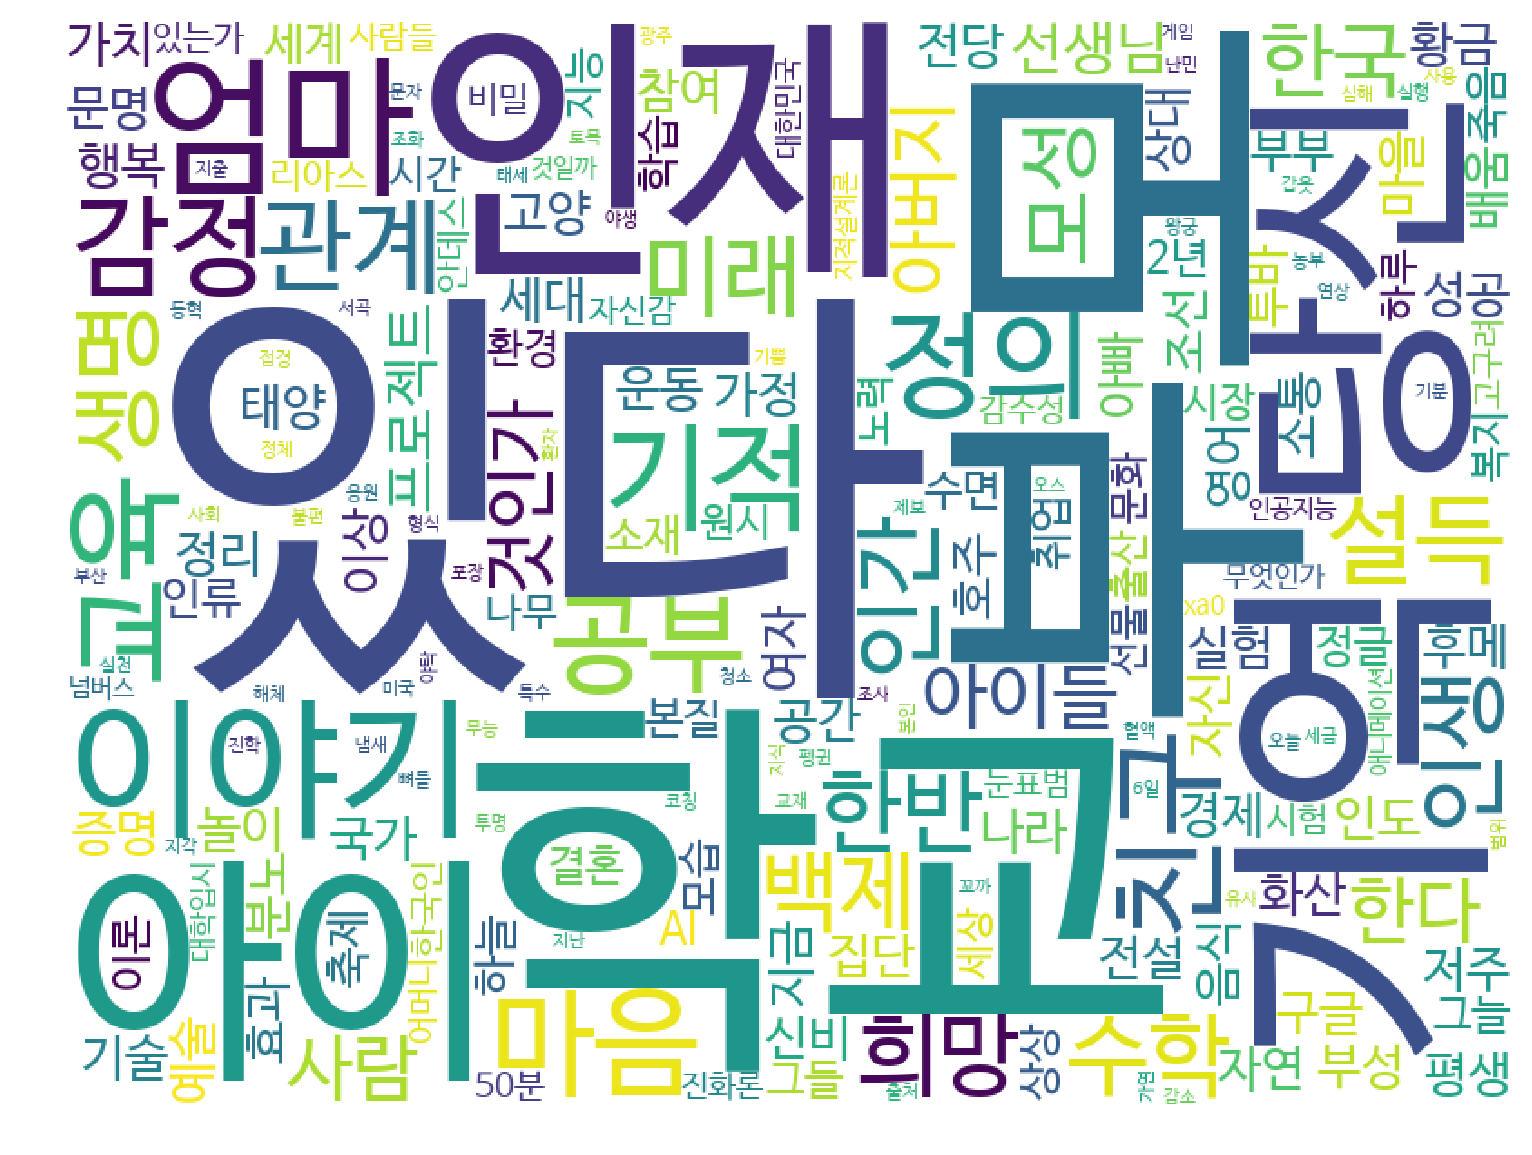

Wall time: 5.05 s


In [34]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))

In [62]:
sample_index = 190

In [63]:
sample_title = df['epi'][sample_index]
sample_title

'앙트레프레너, 경제강국의 비밀 4부 왕들의 선택'

In [64]:
sample_content = df['long'][sample_index]
sample_content[:100]

'["\\\\n“부자나라는 어떻게 부자가 됐을까”“가난한 나라는 왜 여전히 가난한가” \\\\xa0 <앙트레프레너 - 경제강국의 비밀>은 이 단순하면서도 거대한 물음에서 시작됐다.자원의 양'

In [65]:
tokens[sample_index][:10]

['["\\', '“', '부자나라는', '어떻게', '부자가', '됐을까', '”“', '가난한', '나라는', '왜']

In [66]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(tokens[sample_index])
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (37, 21) tokens
building lr-graph completedWall time: 51.9 ms


In [67]:
nouns

{'경제': NounScore(frequency=18, score=0.999605, known_r_ratio=0.3333333333333333),
 '경제강국': NounScore(frequency=9, score=0.9996965, known_r_ratio=1.0),
 '인류': NounScore(frequency=5, score=0.9986005, known_r_ratio=1.0),
 '프랑스': NounScore(frequency=6, score=0.7091571666666666, known_r_ratio=1.0)}

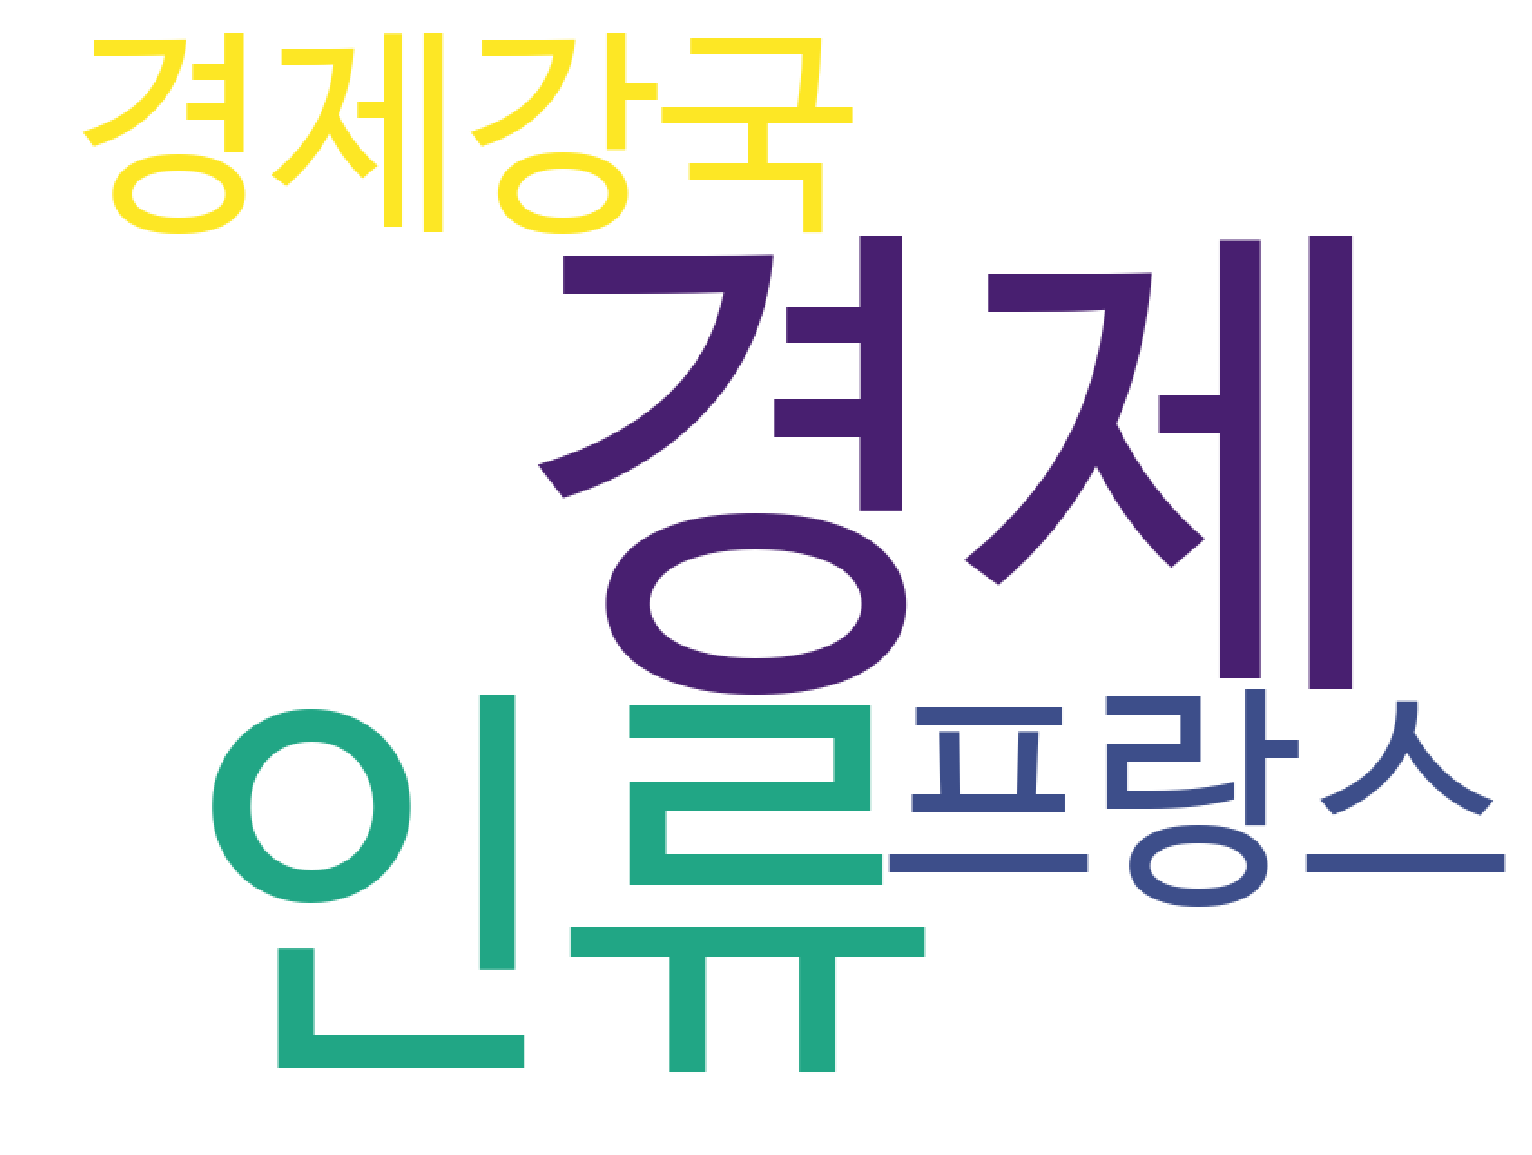

Wall time: 2.67 s


In [68]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))

In [79]:
vod_keys=[]

for sample_index in range(0,887): #661이 문제?

    sample_title = df['epi'][sample_index]
    sample_content = df['long'][sample_index]
    noun_extractor = LRNounExtractor(verbose=True)

    noun_extractor.train(tokens[sample_index])
    nouns = noun_extractor.extract()
    name=[]
    for k in nouns.keys():
        name.append(k)  
    s=(', '.join(name))
    vod_keys.append(s)

    
vod_keys

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (118, 62) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (118, 62) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (40, 29) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (20, 18) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (55, 29) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All

building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (8, 14) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (7, 9) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (28, 26) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (16, 18) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (46, 29) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used nou

used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (20, 9) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (20, 9) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (50, 26) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (50, 25) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (50, 25) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has 

All 2398 r features was loaded
scanning completed
(L,R) has (18, 15) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (18, 15) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (18, 15) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (54, 30) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (54, 30) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (54, 30) tokens
building 

building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (50, 30) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (25, 23) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (28, 21) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (9, 8) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (25, 23) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used no

building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (71, 40) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (71, 40) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (36, 25) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (36, 25) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (46, 27) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used 

(L,R) has (26, 14) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (121, 56) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (121, 56) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (121, 56) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (156, 92) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (156, 92) tokens
building lr-graph completedused default noun predictor

building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (226, 112) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (226, 112) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (226, 112) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (57, 33) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (57, 33) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor

(L,R) has (23, 16) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (44, 33) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (44, 33) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (97, 48) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (97, 48) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (97, 48) tokens
building lr-graph completedused default noun predictor; Sej

building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (210, 129) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (40, 25) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (28, 16) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (130, 67) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (130, 67) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
u

scanning completed
(L,R) has (32, 30) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (32, 30) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (47, 28) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (34, 23) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (49, 25) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (64, 40) tokens
building lr-graph completedused default 

(L,R) has (13, 11) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (19, 18) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (18, 21) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (18, 21) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (14, 11) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (150, 72) tokens
building lr-graph completedused default noun predictor; Se

building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (67, 43) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (91, 53) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (91, 53) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (91, 53) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (79, 40) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used 

scanning completed
(L,R) has (7, 6) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (117, 60) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (40, 22) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (42, 28) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (35, 22) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (117, 60) tokens
building lr-graph completedused default 

All 2398 r features was loaded
scanning completed
(L,R) has (52, 31) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (59, 47) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (76, 41) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (40, 29) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (40, 29) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (40, 29) tokens
building 

building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (165, 75) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (165, 75) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (165, 75) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (117, 60) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (117, 60) tokens
building lr-graph completedused default noun predictor; Sejong corpus predictor


In [44]:
len(vod_keys)

887

# long 에서 내용없음을 빼고는 다 잘 뽑힘! tag에 합쳐주자

In [45]:
import pandas as pd

data2 = pd.DataFrame(
    {'tag': vod_keys},
    columns={'tag'})
data2.tail()

,tag
882,"늑대, 사냥, 초원, 때문, 동물, 모습, 사람, 몽골, 사람들"
883,"한국, 변화, 유목민"
884,"야탁, 한국, 문화, 몽골, 김종암, 가야금, 제자들"
885,"세계, 제작, 한국, 거스타, 사람들, 홉스굴, 샤머니즘"
886,"한국, 산맥, 몽골, 아버지"


In [46]:
data2.shape

(887, 1)

In [47]:
df.shape

(887, 8)

In [48]:
df.head(2) # 잘들어가짐

,index,tv,title,epi,dates,links,synop,long
0,0,ebs,다큐프라임,"비밀의 땅 파미르 - 2부 비밀의 땅, 숨겨진 강",2018.09.11,http://www.ebs.co.kr/tv/show?courseId=BP0PAPB0...,"""아시아의 고산지대인 파미르, 텐샨,히말라야 의 자연과 사람들의 삶을 알아본다. 중...","['\n\n\n\n\n\n단 한 번도 공개된 적 없는 비밀의 땅, 세계의 지붕 파미..."
1,1,ebs,다큐프라임,비밀의 땅 파미르 - 1부 세계의 지붕,2018.09.10,http://www.ebs.co.kr/tv/show?courseId=BP0PAPB0...,"""세계의 지붕 파미르에 서식하는 다양한 야생동물들의 생태소개 1부에서는 파미르에 서...","['\n\n\n\n\n\n단 한 번도 공개된 적 없는 비밀의 땅, 세계의 지붕 파미..."


In [49]:
data2.head(2)

,tag
0,"늑대, 빙하, 고원, 텐샨, 사람들, 고지대, 파미르, 저지대, 야생동물"
1,"늑대, 빙하, 고원, 텐샨, 사람들, 고지대, 파미르, 저지대, 야생동물"


In [50]:
df['tag']=data2

In [70]:
del df['Unnamed: 0']

In [77]:
df.tail(1)

,index,tv,title,epi,dates,links,synop,long,tag
886,925,ebs,다큐프라임,"하늘의 땅, 몽골-제1부 초원의 전설 토올",2008.03.03,http://www.ebs.co.kr/tv/show?courseId=BP0PAPB0...,NaN,['\n-KBI와 EBS가 공동기획하고 문화관광부가 제작을 지원한-한몽 공동제작 프...,"한국, 산맥, 몽골, 아버지"


In [52]:
df.isnull().sum()

index     0
tv        0
title     0
epi       0
dates     0
links     0
synop    10
long      0
tag       0
dtype: int64

In [53]:
df.to_csv('crawling_special_eb_ver2.csv',sep=',', encoding='utf-8')
df=pd.read_csv('crawling_special_eb_ver2.csv',encoding='utf-8')

# long에서 null값만 보자

In [78]:
#df[df['tag'].isna()]